<a href="https://colab.research.google.com/github/probml/pyprobml/blob/master/notebooks/book2/28/kf_spiral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tracking a 2d point spiraling in the plane using the Kalman filter

We use the [ssm-jax](https://github.com/probml/ssm-jax/blob/main/ssm_jax/) library.


In [1]:
%pip install -qq git+https://github.com/probml/ssm-jax.git

     |████████████████████████████████| 140 kB 3.3 MB/s 
     |████████████████████████████████| 72 kB 140 kB/s 
     |████████████████████████████████| 272 kB 9.1 MB/s 


In [2]:
# Silence WARNING:root:The use of `check_types` is deprecated and does not have any effect.
# https://github.com/tensorflow/probability/issues/1523
import logging

logger = logging.getLogger()


class CheckTypesFilter(logging.Filter):
    def filter(self, record):
        return "check_types" not in record.getMessage()


logger.addFilter(CheckTypesFilter())

spiral_data.pdf
spiral_filtered.pdf
spiral_smoothed.pdf


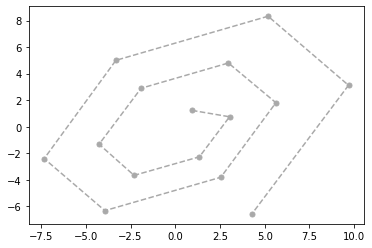

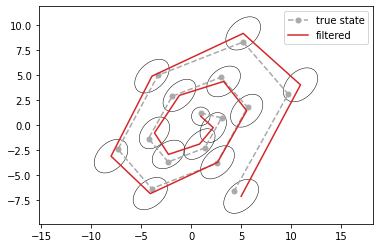

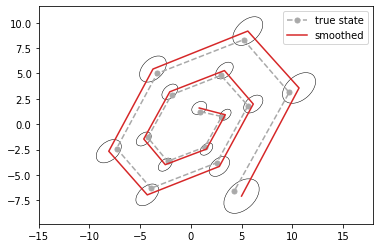

In [3]:
try:
    from ssm_jax.lgssm.demos.kf_spiral import kf_spiral, plot_kf_spiral
except ModuleNotFoundError:
    %pip install -qq ssm_jax
    from ssm_jax.lgssm.demos.kf_spiral import kf_spiral, plot_kf_spiral

x, y, lgssm_posterior = kf_spiral()
dict_figures = plot_kf_spiral(x, y, lgssm_posterior)

for k, v in dict_figures.items():
    fname = k + ".pdf"
    print(fname)
    fig = v
    fig.savefig(fname)